# Week 3

In [163]:
#import libraries
import pandas as pd

## import and explore census data to figure out which columns to keep

In [164]:
pop_df = pd.read_csv('./data/PEP_2017_PEPAGESEX.csv', skiprows=1)

## subset out required columns

In [165]:
#isolate all the columns from the dataframe
pop_cols = pop_df.columns

#make a mask to pick out all the 'April estimate' values using regexes
april_mask = pop_cols.str.contains('April.*?estimate', case=False)

#subset out everything but all the April estimate values
noest = pop_cols[~april_mask]
print(noest)

Index(['Id', 'Id2', 'Geography', 'April 1, 2010 - Census - Both Sexes; Total',
       'April 1, 2010 - Census - Male; Total',
       'April 1, 2010 - Census - Female; Total',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2010 - Male; Total',
       'Population Estimate (as of July 1) - 2010 - Female; Total',
       'Population Estimate (as of July 1) - 2011 - Both Sexes; Total',
       ...
       'Population Estimate (as of July 1) - 2014 - Females; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Male; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Female; Median age (years)',
       'Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2016 - Male; Median age (years)',
       'Population Estimate (as of July 1) - 

In [166]:
#pick out all the old people using a regex and subset
old_mask = noest.str.contains('July.*?201[047].*?Both.*?[5-9][0-9] to|July.*?201[047].*?Both.*?Total.*?85 years and')
old_people_columns = noest[old_mask]
old_people_columns

Index(['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
       'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
       'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
       'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 65 to 69 years',
       'Population Es

In [167]:
#write a regex that pulls out all of the other stuff we need and subset
odd_mask = noest.str.contains('Geography|July.*?201[047].*?Both.*?Total$|July.*?201[047].*?both.*?median', case=False)
misc_columns = noest[odd_mask]

In [168]:
#convert to lists (so we can combine the series we made) and combine them into one data structure
req_cols = list(misc_columns) + list(old_people_columns)

In [169]:
#subset df by the data structure we created
subset_pop_df = pop_df.loc[:,req_cols]
subset_pop_df.shape

(95, 31)

## rename columns

In [170]:
subset_pop_df.columns
new_col_lables = ['county', 'pop2010all', 'pop2014all', 'pop2017all', 'median_age_2010', 'median_age_2014', 'median_age_2017', 'pop2010_50to54','pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
    'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
    'pop2010_85over', 'pop2014_85over', 'pop2017_85over']

subset_pop_df.columns = new_col_lables
subset_pop_df.head()

,county,pop2010all,pop2014all,pop2017all,median_age_2010,median_age_2014,median_age_2017,pop2010_50to54,pop2014_50to54,pop2017_50to54,...,pop2017_70to74,pop2010_75to79,pop2014_75to79,pop2017_75to79,pop2010_80to84,pop2014_80to84,pop2017_80to84,pop2010_85over,pop2014_85over,pop2017_85over
0,"Anderson County, Tennessee",75112,75131,76257,42.6,43.3,43.2,5850,5690,5296,...,3765,2276,2327,2501,1969,1779,1785,2135,2211,2173
1,"Bedford County, Tennessee",45086,46259,48117,36.5,37.2,37.5,3043,3207,3239,...,1988,992,1156,1321,756,729,811,647,679,640
2,"Benton County, Tennessee",16511,16176,15986,45.6,46.7,47.4,1259,1204,1179,...,1075,562,681,717,414,399,418,362,409,415
3,"Bledsoe County, Tennessee",12882,14419,14717,42.5,43.3,43.9,1005,1216,1185,...,732,344,421,510,234,275,267,178,209,264
4,"Blount County, Tennessee",123213,125827,129929,41.5,43.1,43.8,9152,9658,9522,...,6808,3468,4074,4663,2550,2591,2939,2390,2656,2786


## import cancer and hospice dfs

In [171]:
#import hospice data, restrict to TN, limit columns, and reformat
hospice = pd.read_csv('./data/Hospice_General_Information.csv')

tn_hospice = hospice[hospice['State'] == 'TN']


tn_hospice = tn_hospice[['Facility Name', 'Address Line 1', 'City', 'State', 
                                     'County Name', 'CMS Region', 'Ownership Type', 'Certification Date']]

tn_hospice.columns = tn_hospice.columns.str.lower()
tn_hospice.head()

,facility name,address line 1,city,state,county name,cms region,ownership type,certification date
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2890,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",MEMPHIS,TN,Shelby,4,Non-Profit,08/31/1984
2891,HOSPICE OF CHATTANOOGA INC,4411 OAKWOOD DRIVE,CHATTANOOGA,TN,Hamilton,4,Non-Profit,06/30/1986
2892,AMEDISYS HOSPICE CARE,6570 STAGE ROAD SUITE 110,BARTLETT,TN,Shelby,4,For-Profit,02/09/1987
2893,NORTHCREST HOME HEALTH AND HOSPICE,212 NORTHCREST DRIVE,SPRINGFIELD,TN,Robertson,4,Other,07/13/1987


In [172]:
#import cancer df, reformat columns
cancer_df = pd.read_csv('./data/cancer_deaths.csv', skiprows=4, skipfooter=14, engine='python')
cancer_df

,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott County,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham County,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3
5,Claiborne County,47025,No,237.3,216.4,259.8,100,stable,-0.1,-0.7,0.4
6,Hancock County,47067,No,236.2,193.1,287.1,22,stable,0.4,-0.8,1.6
7,Union County,47173,No,234.2,206.1,265.3,53,stable,-0.5,-1.2,0.2
8,Benton County,47005,No,233.9,207.1,263.6,59,stable,0.3,-0.4,1.1
9,Houston County,47083,No,227.4,188.9,272.1,26,stable,0.4,-0.6,1.3


In [173]:
cancer_df_cols = ['county', 'fips', 'met_obj', 'deaths_per_100k', 'dr_ci_lower',
                 'dr_ci_upper', 'av_ann_count', 'recent_trend', '5_year_death_trend',
                 'trend_ci_lower', 'trend_ci_upper']
cancer_df.columns = cancer_df_cols
cancer_df.head()

,county,fips,met_obj,deaths_per_100k,dr_ci_lower,dr_ci_upper,av_ann_count,recent_trend,5_year_death_trend,trend_ci_lower,trend_ci_upper
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott County,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham County,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3


# merge pop_df and cancer_df

In [174]:
#reformat cancer_df's county coulmn to match hospices's country to merge
cancer_df = cancer_df.loc[cancer_df['county'].str.contains('County')]
cancer_df['county'] = cancer_df['county'].replace(to_replace=r'.County', value='', regex=True)
cancer_df.head()

C:\Users\prael\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,county,fips,met_obj,deaths_per_100k,dr_ci_lower,dr_ci_upper,av_ann_count,recent_trend,5_year_death_trend,trend_ci_lower,trend_ci_upper
2,Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3
5,Claiborne,47025,No,237.3,216.4,259.8,100,stable,-0.1,-0.7,0.4
6,Hancock,47067,No,236.2,193.1,287.1,22,stable,0.4,-0.8,1.6


In [175]:
#reformat census data to match hospicses's county to merge
subset_pop_df['county'] = subset_pop_df['county'].replace(to_replace=r'.County.*?$', value='', regex=True)
subset_pop_df.head()

,county,pop2010all,pop2014all,pop2017all,median_age_2010,median_age_2014,median_age_2017,pop2010_50to54,pop2014_50to54,pop2017_50to54,...,pop2017_70to74,pop2010_75to79,pop2014_75to79,pop2017_75to79,pop2010_80to84,pop2014_80to84,pop2017_80to84,pop2010_85over,pop2014_85over,pop2017_85over
0,Anderson,75112,75131,76257,42.6,43.3,43.2,5850,5690,5296,...,3765,2276,2327,2501,1969,1779,1785,2135,2211,2173
1,Bedford,45086,46259,48117,36.5,37.2,37.5,3043,3207,3239,...,1988,992,1156,1321,756,729,811,647,679,640
2,Benton,16511,16176,15986,45.6,46.7,47.4,1259,1204,1179,...,1075,562,681,717,414,399,418,362,409,415
3,Bledsoe,12882,14419,14717,42.5,43.3,43.9,1005,1216,1185,...,732,344,421,510,234,275,267,178,209,264
4,Blount,123213,125827,129929,41.5,43.1,43.8,9152,9658,9522,...,6808,3468,4074,4663,2550,2591,2939,2390,2656,2786


In [176]:
#outer merge
pop_cancer_df = cancer_df.merge(subset_pop_df, how='outer', on='county')

## count hospice per county and add to pop_cancer_df

In [177]:
#count hospices and add counties that lack hospices
hospice_counts = tn_hospice['county name'].value_counts().to_dict()

no_hospice_counties = {county:0 for county in pop_cancer_df['county'] if county not in hospice_counts.keys()}
hospice_counts.update(no_hospice_counties)
hospice_counts

{'Davidson': 8,
 'Hamilton': 5,
 'Shelby': 5,
 'Knox': 5,
 'Williamson': 2,
 'Washington': 2,
 'Madison': 2,
 'Robertson': 2,
 'Bradley': 2,
 'Carroll': 2,
 'Perry': 1,
 'Rutherford': 1,
 'Lincoln': 1,
 'Putnam': 1,
 'Cumberland': 1,
 'Henry': 1,
 'Fayette': 1,
 'Obion': 1,
 'Claiborne': 1,
 'Coffee': 1,
 'Cocke': 1,
 'Carter': 1,
 'Hancock': 1,
 'Blount': 1,
 'Hamblen': 1,
 'Sullivan': 1,
 'Fentress': 1,
 'Montgomery': 1,
 'Wayne': 1,
 'McMinn': 1,
 'Sumner': 1,
 'Trousdale': 0,
 'Scott': 0,
 'Cheatham': 0,
 'Union': 0,
 'Benton': 0,
 'Houston': 0,
 'Sequatchie': 0,
 'Grainger': 0,
 'Lake': 0,
 'Campbell': 0,
 'Stewart': 0,
 'Overton': 0,
 'Marion': 0,
 'White': 0,
 'Johnson': 0,
 'Meigs': 0,
 'Humphreys': 0,
 'Macon': 0,
 'Grundy': 0,
 'Tipton': 0,
 'Polk': 0,
 'Clay': 0,
 'Decatur': 0,
 'Henderson': 0,
 'Lauderdale': 0,
 'McNairy': 0,
 'Marshall': 0,
 'Lewis': 0,
 'Cannon': 0,
 'Gibson': 0,
 'Dickson': 0,
 'Hickman': 0,
 'Warren': 0,
 'Unicoi': 0,
 'Hawkins': 0,
 'Hardeman': 0,
 'Rh

In [178]:
#convert to series and add to pop_cancer_df
s_hospice_counts = pd.Series(hospice_counts, name='county')
pop_cancer_hospice_df = pop_cancer_df.set_index('county')
pop_cancer_hospice_df['hospice_count'] = s_hospice_counts
pop_cancer_hospice_df['hospice_count']

county
Trousdale     0
Scott         0
Cheatham      0
Claiborne     1
Hancock       1
Union         0
Benton        0
Houston       0
Sequatchie    0
Cocke         1
Grainger      0
Carroll       2
Lake          0
Campbell      0
Stewart       0
Overton       0
Marion        0
White         0
Perry         1
Johnson       0
Meigs         0
Obion         1
Humphreys     0
Macon         0
Fentress      1
Grundy        0
Tipton        0
Polk          0
Clay          0
Decatur       0
             ..
Franklin      0
Bradley       2
Dyer          0
Bedford       0
Sullivan      1
Maury         0
Lincoln       1
Morgan        0
Anderson      0
Washington    2
DeKalb        0
Chester       0
Knox          5
Carter        1
Cumberland    1
Loudon        0
Hamilton      5
Madison       2
Wilson        0
Rutherford    1
Bledsoe       0
Jefferson     0
Blount        1
Crockett      0
Sumner        1
Van Buren     0
Pickett       0
Fayette       1
Williamson    2
Moore         0
Name: hospice_cou

In [179]:
#rename df for convinience going forward
pch_df = pop_cancer_hospice_df
pch_df

,fips,met_obj,deaths_per_100k,dr_ci_lower,dr_ci_upper,av_ann_count,recent_trend,5_year_death_trend,trend_ci_lower,trend_ci_upper,...,pop2010_75to79,pop2014_75to79,pop2017_75to79,pop2010_80to84,pop2014_80to84,pop2017_80to84,pop2010_85over,pop2014_85over,pop2017_85over,hospice_count
county,,,,,,,,,,,,,,,,,,,,,
Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3,...,194,222,254,128,135,146,127,132,129,0
Scott,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1,...,525,593,698,369,366,373,327,335,356,0
Cheatham,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3,...,742,904,963,503,530,594,360,395,461,0
Claiborne,47025,No,237.3,216.4,259.8,100,stable,-0.1,-0.7,0.4,...,943,1060,1124,567,671,740,517,508,529,1
Hancock,47067,No,236.2,193.1,287.1,22,stable,0.4,-0.8,1.6,...,217,241,233,138,152,161,126,129,122,1
Union,47173,No,234.2,206.1,265.3,53,stable,-0.5,-1.2,0.2,...,448,526,650,291,313,348,223,265,321,0
Benton,47005,No,233.9,207.1,263.6,59,stable,0.3,-0.4,1.1,...,562,681,717,414,399,418,362,409,415,0
Houston,47083,No,227.4,188.9,272.1,26,stable,0.4,-0.6,1.3,...,279,287,329,200,193,184,163,174,189,0
Sequatchie,47153,No,224.3,194.3,257.9,43,rising,1.3,0.3,2.3,...,346,472,542,239,270,288,221,254,281,0


# Week 4

In [180]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## null values and average death rates

In [181]:
#find if there are null values
pch_df.isnull().sum().sum()

0

In [182]:
#average death rate for counties in TN
pch_df['deaths_per_100k'].mean()

195.8726315789474

## distribution plots

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


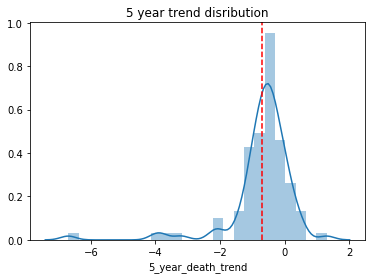

In [183]:
#distribution for recent 5 year trend
sns.distplot(pch_df['5_year_death_trend'])
m = pch_df['5_year_death_trend'].mean()
plt.axvline(m, linestyle='--', color='red')
plt.title('5 year trend disribution')
plt.show()

In [184]:
pch_df['met_obj'].unique()

array(['No', 'Yes'], dtype=object)

In [185]:
#distribution of 5 year trends meeting or not meeting healthy people 2020
#not_meeting_hp = pch_df.loc[pch_df['deaths_per_100k'] >= 161.4]
#meeting_hp = pch_df.loc[pch_df['deaths_per_100k'] < 161.4]

not_meeting_hp = pch_df[pch_df['met_obj'] == 'No']
meeting_hp = pch_df[pch_df['met_obj'] == 'Yes']

print('all shape: ' +  str(pch_df.shape) + '\n' + 'not meeting hp shape: ' + str(not_meeting_hp.shape) + '\n' + 'meeting hp shape: ' + str(meeting_hp.shape))

all shape: (95, 41)
not meeting hp shape: (89, 41)
meeting hp shape: (6, 41)


C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


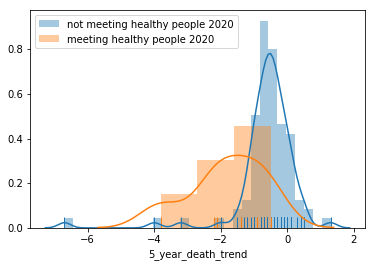

In [186]:
sns.distplot(not_meeting_hp['5_year_death_trend'], rug=True, hist_kws={"label":"not meeting healthy people 2020"})
sns.distplot(meeting_hp['5_year_death_trend'], rug=True, hist_kws={"label":"meeting healthy people 2020"})
plt.legend()

In [187]:
not_meeting_hp['deaths_per_100k']
df = not_meeting_hp.copy()
df.sort_index(inplace=True)
df['deaths_per_100k']

county
Anderson      180.6
Bedford       182.7
Benton        233.9
Bledsoe       170.0
Blount        168.2
Bradley       183.0
Campbell      219.2
Cannon        202.4
Carroll       221.8
Carter        176.2
Cheatham      239.6
Chester       178.4
Claiborne     237.3
Clay          209.1
Cocke         222.1
Coffee        194.2
Crockett      164.1
Cumberland    174.4
Davidson      184.7
DeKalb        178.8
Decatur       208.7
Dickson       201.1
Dyer          182.9
Fentress      211.1
Franklin      184.1
Gibson        202.0
Giles         193.7
Grainger      222.0
Greene        185.6
Grundy        210.7
              ...  
Meigs         214.3
Monroe        191.6
Montgomery    188.4
Morgan        180.7
Obion         214.1
Overton       217.0
Perry         216.0
Polk          209.5
Putnam        201.5
Rhea          194.9
Roane         185.2
Robertson     187.2
Rutherford    170.3
Scott         241.0
Sequatchie    224.3
Sevier        186.7
Shelby        195.0
Smith         192.2
Stewart      

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


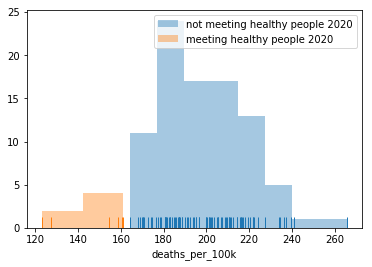

In [188]:
sns.distplot(not_meeting_hp['deaths_per_100k'], kde=False, rug=True, hist_kws={"label":"not meeting healthy people 2020"})
sns.distplot(meeting_hp['deaths_per_100k'], kde=False, rug=True, hist_kws={"label":"meeting healthy people 2020"})
plt.legend()

## finding counties with certain values

In [189]:
#counties with more than 2 hospice facilities
pch_df.loc[pch_df['hospice_count'] > 2, 'hospice_count']

county
Shelby      5
Davidson    8
Knox        5
Hamilton    5
Name: hospice_count, dtype: int64

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


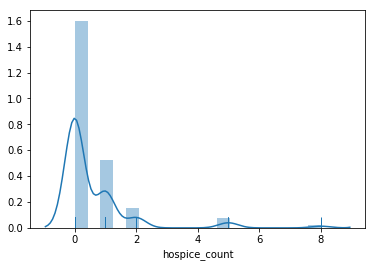

In [190]:
sns.distplot(pch_df['hospice_count'], rug=True)

In [191]:
#counties with the highest death rate per 100k people
pch_df['deaths_per_100k'].nlargest(5)

county
Trousdale    265.5
Scott        241.0
Cheatham     239.6
Claiborne    237.3
Hancock      236.2
Name: deaths_per_100k, dtype: float64

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


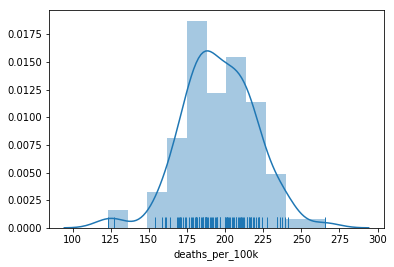

In [192]:
sns.distplot(pch_df['deaths_per_100k'], rug=True)

## new feature creation

In [193]:
def find_percent_over_fifty(dataframe, regex_over_fifty, total_pop_col):
    '''
    finds the over 50 people per county in the passed df by the passed regexes
    
    implements regex across columns
    
    divides over fifty sum per county by total and calculates % over 50
    '''
    
    #find columns and sum
    pop_subset = dataframe.columns[dataframe.columns.str.contains(regex_over_fifty)]
    pop_sum_per_county = pch_df.loc[:,pop_subset].sum(axis=1)
    
    #divide and return
    percent_over_fifty = (pop_sum_per_county / dataframe[total_pop_col]) * 100
    
    return percent_over_fifty

In [194]:
#make new df to house percent data without pop over 50 data (i.e. delete rows we won't need again)
pch_pcts = pch_df.copy()
pch_pcts = pch_pcts.loc[:,~pch_pcts.columns.str.contains('pop201\d_')]

#add over fifty percentages
pch_pcts['percent_pop_over_50_2010'] = find_percent_over_fifty(pch_df, 'pop2010_', 'pop2010all')
pch_pcts['percent_pop_over_50_2014'] = find_percent_over_fifty(pch_df, 'pop2014_', 'pop2014all')
pch_pcts['percent_pop_over_50_2017'] = find_percent_over_fifty(pch_df, 'pop2017_', 'pop2017all')
pch_pcts[['pop2010all', 'pop2014all', 'pop2017all', 'percent_pop_over_50_2010',  'percent_pop_over_50_2014', 'percent_pop_over_50_2017']]

,pop2010all,pop2014all,pop2017all,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017
county,,,,,,
Trousdale,7874,7993,10083,34.950470,37.257600,31.677080
Scott,22227,21986,21989,32.977910,35.149641,36.349993
Cheatham,39122,39604,40330,32.327079,35.604989,37.302256
Claiborne,32216,31529,31609,37.602434,39.858543,41.019963
Hancock,6802,6624,6600,40.002940,41.817633,43.196970
Union,19118,18990,19442,35.406423,38.825698,40.546240
Benton,16511,16176,15986,43.358973,45.295500,46.428125
Houston,8447,8216,8213,39.138156,40.713242,41.677828
Sequatchie,14127,14634,14736,36.908048,40.009567,41.788817


In [195]:
#2017 counties with a pop over fifty greater than half
pch_pcts[pch_pcts['percent_pop_over_50_2017'] > 50].index.values

array(['Cumberland', 'Pickett'], dtype=object)

In [196]:
#2017 counties with less than one-third over 50
pch_pcts.loc[pch_pcts['percent_pop_over_50_2017'] < ((1/3)*100)]['percent_pop_over_50_2017']

county
Trousdale     31.677080
Shelby        31.978172
Montgomery    23.904247
Davidson      29.353209
Rutherford    27.063883
Williamson    33.009365
Name: percent_pop_over_50_2017, dtype: float64

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


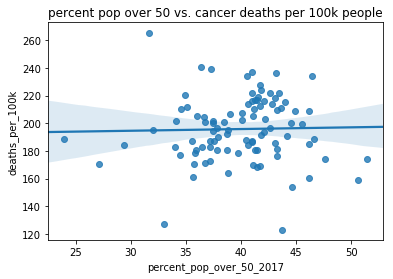

In [197]:
#scatter plot between cancer deaths and % pop over 50 in 2017
sns.regplot(x='percent_pop_over_50_2017', y = 'deaths_per_100k', data=pch_pcts)
plt.title('percent pop over 50 vs. cancer deaths per 100k people')
plt.show()
plt.close()

In [198]:
#normalized hospice rate feature
pch_pcts['normalized_hospice_rate'] = (pch_pcts['hospice_count'] / pch_pcts['pop2017all']) * 100000
pch_pcts[['pop2017all','hospice_count', 'normalized_hospice_rate']]

,pop2017all,hospice_count,normalized_hospice_rate
county,,,
Trousdale,10083,0,0.000000
Scott,21989,0,0.000000
Cheatham,40330,0,0.000000
Claiborne,31609,1,3.163656
Hancock,6600,1,15.151515
Union,19442,0,0.000000
Benton,15986,0,0.000000
Houston,8213,0,0.000000
Sequatchie,14736,0,0.000000


C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


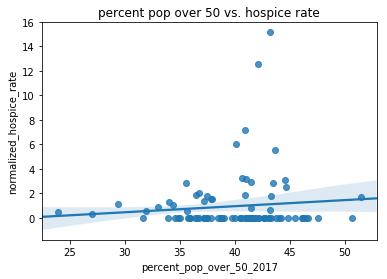

In [199]:
#plotting hospice vs. pop over 50 percentage
sns.regplot(x='percent_pop_over_50_2017', y = 'normalized_hospice_rate', data=pch_pcts)
plt.title('percent pop over 50 vs. hospice rate')
plt.show()
plt.close()

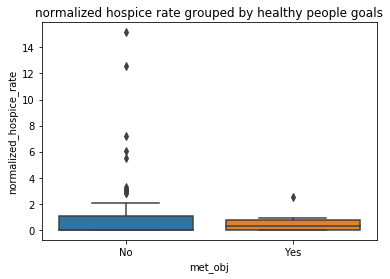

In [200]:
#boxplot of hospice rate by healthy people goals
sns.boxplot(x='met_obj',y='normalized_hospice_rate', data=pch_pcts)
plt.title('normalized hospice rate grouped by healthy people goals')
plt.show()
plt.close()